In [54]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import keys
import requests
import json
import time
from datetime import datetime
from scipy.stats import linregress
key = keys["weather_key"]

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [3]:
cities = []
for coordinate in coordinates :
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    if city not in cities :
          cities.append(city)

In [4]:
len(cities)

583

In [5]:
# generate weather api url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + key
print("url")

url


In [6]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "boston"
print("city_url")

city_url


In [7]:
# Create a weather request for a city
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")
city_weather.json()

City Weather found.


{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 54.3,
  'feels_like': 51.78,
  'temp_min': 50.83,
  'temp_max': 57.15,
  'pressure': 1017,
  'humidity': 50},
 'visibility': 10000,
 'wind': {'speed': 11.99, 'deg': 355, 'gust': 21},
 'clouds': {'all': 20},
 'dt': 1635802706,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1635765466,
  'sunset': 1635802665},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [8]:
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | brechin
Processing Record 3 of Set 1 | mount isa
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | malindi
Processing Record 6 of Set 1 | huancavelica
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | rio grande
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | banepa
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | saldanha
Processing Record 17 of Set 1 | dire dawa
Processing Record 18 of Set 1 | halalo
City not found. Skipping...
Processing Record 19 of Set 1 | wuchang
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | amderma
City not found. Skipping...
Processing Record 22 of Set 1 | avaru

Processing Record 35 of Set 4 | paka
Processing Record 36 of Set 4 | faya
Processing Record 37 of Set 4 | padang
Processing Record 38 of Set 4 | terney
Processing Record 39 of Set 4 | eichstatt
Processing Record 40 of Set 4 | port blair
Processing Record 41 of Set 4 | east massapequa
Processing Record 42 of Set 4 | clyde river
Processing Record 43 of Set 4 | belmonte
Processing Record 44 of Set 4 | martapura
Processing Record 45 of Set 4 | fairbanks
Processing Record 46 of Set 4 | kailua
Processing Record 47 of Set 4 | monchegorsk
Processing Record 48 of Set 4 | kuche
City not found. Skipping...
Processing Record 49 of Set 4 | kilindoni
Processing Record 50 of Set 4 | xining
Processing Record 1 of Set 5 | hasaki
Processing Record 2 of Set 5 | shimoda
Processing Record 3 of Set 5 | lev tolstoy
Processing Record 4 of Set 5 | weihe
Processing Record 5 of Set 5 | great yarmouth
Processing Record 6 of Set 5 | jieshi
Processing Record 7 of Set 5 | laguna
Processing Record 8 of Set 5 | gamba


Processing Record 31 of Set 8 | warqla
City not found. Skipping...
Processing Record 32 of Set 8 | makakilo city
Processing Record 33 of Set 8 | baruun-urt
Processing Record 34 of Set 8 | tondano
Processing Record 35 of Set 8 | anloga
Processing Record 36 of Set 8 | gubin
Processing Record 37 of Set 8 | aitape
Processing Record 38 of Set 8 | sisimiut
Processing Record 39 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 40 of Set 8 | buraydah
Processing Record 41 of Set 8 | the valley
Processing Record 42 of Set 8 | socota
Processing Record 43 of Set 8 | kindu
Processing Record 44 of Set 8 | ylivieska
Processing Record 45 of Set 8 | springville
Processing Record 46 of Set 8 | mandeville
Processing Record 47 of Set 8 | yar
Processing Record 48 of Set 8 | namibe
Processing Record 49 of Set 8 | teknaf
Processing Record 50 of Set 8 | panama city
Processing Record 1 of Set 9 | ixtapa
Processing Record 2 of Set 9 | santa maria
Processing Record 3 of Set 9 | nesoddtangen
Processing Recor

Processing Record 20 of Set 12 | banda aceh
Processing Record 21 of Set 12 | tete
Processing Record 22 of Set 12 | aykhal
Processing Record 23 of Set 12 | jalu
Processing Record 24 of Set 12 | butler
Processing Record 25 of Set 12 | satitoa
City not found. Skipping...
Processing Record 26 of Set 12 | mayari
City not found. Skipping...
Processing Record 27 of Set 12 | phirangipuram
Processing Record 28 of Set 12 | san pedro
Processing Record 29 of Set 12 | rio gallegos
Processing Record 30 of Set 12 | hofn
Processing Record 31 of Set 12 | lata
Processing Record 32 of Set 12 | zeya
Processing Record 33 of Set 12 | mingshui
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
# only use this if there isnt already a city_data dataframe
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,72.32,66,100,11.63,PF,2021-11-01 21:46:03
1,Brechin,56.7299,-2.6573,47.25,78,97,13.85,GB,2021-11-01 21:46:03
2,Mount Isa,-20.7333,139.5000,82.17,54,87,11.50,AU,2021-11-01 21:46:03
3,Albany,42.6001,-73.9662,51.75,46,37,6.15,US,2021-11-01 21:41:12
4,Malindi,-3.2175,40.1191,77.88,87,23,8.28,KE,2021-11-01 21:46:04
5,Huancavelica,-12.7667,-74.9833,46.45,67,89,5.01,PE,2021-11-01 21:46:04
6,Hermanus,-34.4187,19.2345,54.90,68,9,9.48,ZA,2021-11-01 21:46:04
7,Rio Grande,-32.0350,-52.0986,77.11,88,100,15.46,BR,2021-11-01 21:44:47
8,Hobart,-42.8794,147.3294,61.02,77,75,1.99,AU,2021-11-01 21:46:05
9,Busselton,-33.6500,115.3333,50.04,74,100,11.30,AU,2021-11-01 21:46:05


In [ ]:
# if there is already a citydata csv use this block of code to convert it to a dataframe 
city_data_df = pd.read_csv(weather_data/cities.csv)

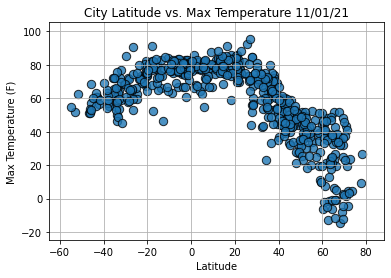

In [50]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
today = time.strftime("%x")

# create a scatter plot 
plt.scatter(lats,
            max_temps,
            s=70,
            edgecolors="black",
            linewidth=1,
            alpha=.8
           )
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(min(lats) - 10, max(lats) + 10)
plt.ylim(min(max_temps) - 10, max(max_temps) + 10)

# save the graph 
plt.savefig("weather_data/Fig1.png")
plt.show()

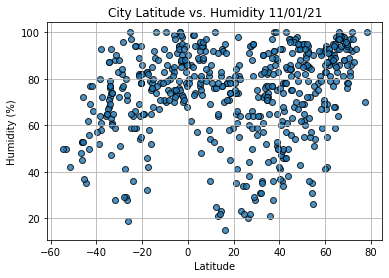

In [51]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

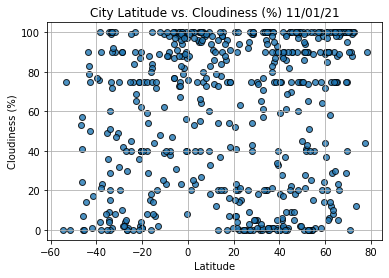

In [52]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

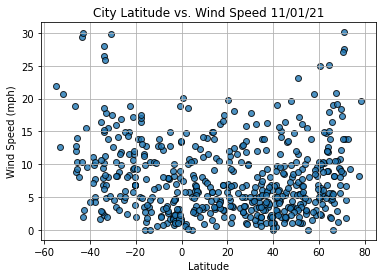

In [53]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [59]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
regress_values = [(lat * slope + intercept) for lat in lats]

y = -0.45x + 92.94
The p-value is: 0.011


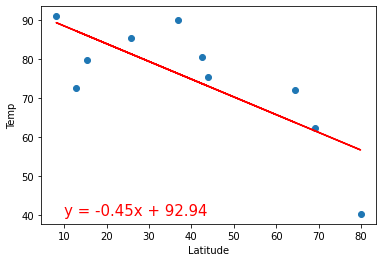

In [60]:
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [62]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [83]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

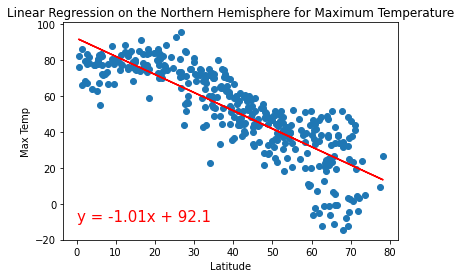

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(0,-10))

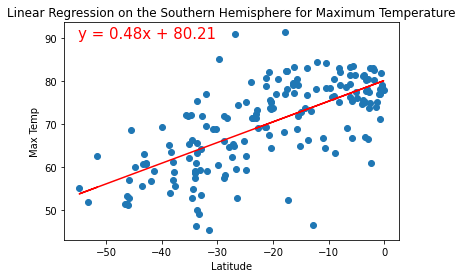

In [110]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-55,90))

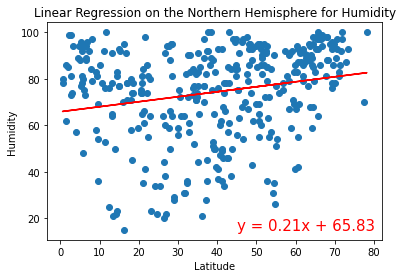

In [133]:

plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Linear Regression on the Northern Hemisphere for Humidity","Humidity",(45,15))

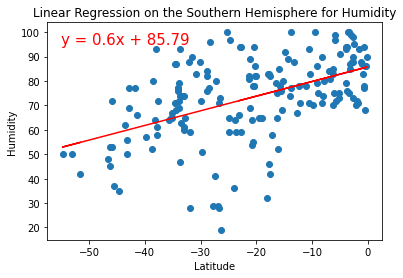

In [128]:

plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Linear Regression on the Southern Hemisphere for Humidity","Humidity",(-55,95))

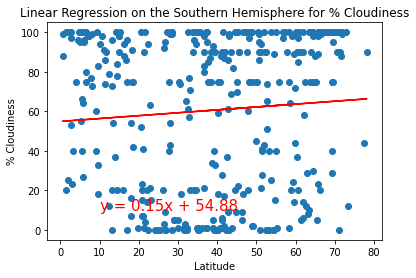

In [137]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(10,10))

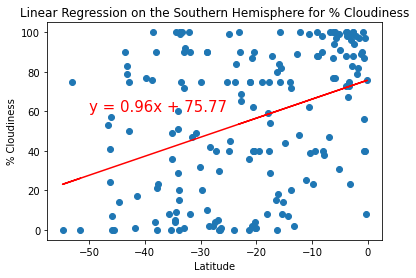

In [136]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

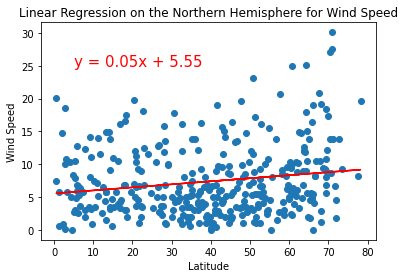

In [142]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(5,25))

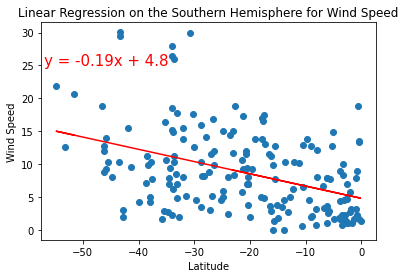

In [145]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-57,25))